In [1]:
# Dataset and columns description - https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading data

In [3]:
"""References (why to use engine='python') -
1. https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
2. https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err/48187106#48187106"""

df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Household Electric Power Consumption\household_power_consumption\household_power_consumption.txt', sep=';', engine='python')
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0


### Data Summary

In [4]:
df.shape

(2075259, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Handling missing values

In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df[df['Date'] == '28/4/2007']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
190476,28/4/2007,00:00:00,1.368,0.086,233.050,5.800,0.000,1.000,0.0
190477,28/4/2007,00:01:00,1.370,0.086,233.220,5.800,0.000,1.000,0.0
190478,28/4/2007,00:02:00,1.372,0.088,233.570,5.800,0.000,2.000,0.0
190479,28/4/2007,00:03:00,1.370,0.086,233.400,5.800,0.000,1.000,0.0
190480,28/4/2007,00:04:00,1.368,0.086,233.250,5.800,0.000,1.000,0.0
...,...,...,...,...,...,...,...,...,...
191911,28/4/2007,23:55:00,?,?,?,?,?,?,NaN
191912,28/4/2007,23:56:00,?,?,?,?,?,?,NaN
191913,28/4/2007,23:57:00,?,?,?,?,?,?,NaN
191914,28/4/2007,23:58:00,?,?,?,?,?,?,NaN


In [8]:
df.replace('?', np.nan, inplace=True)

<AxesSubplot:>

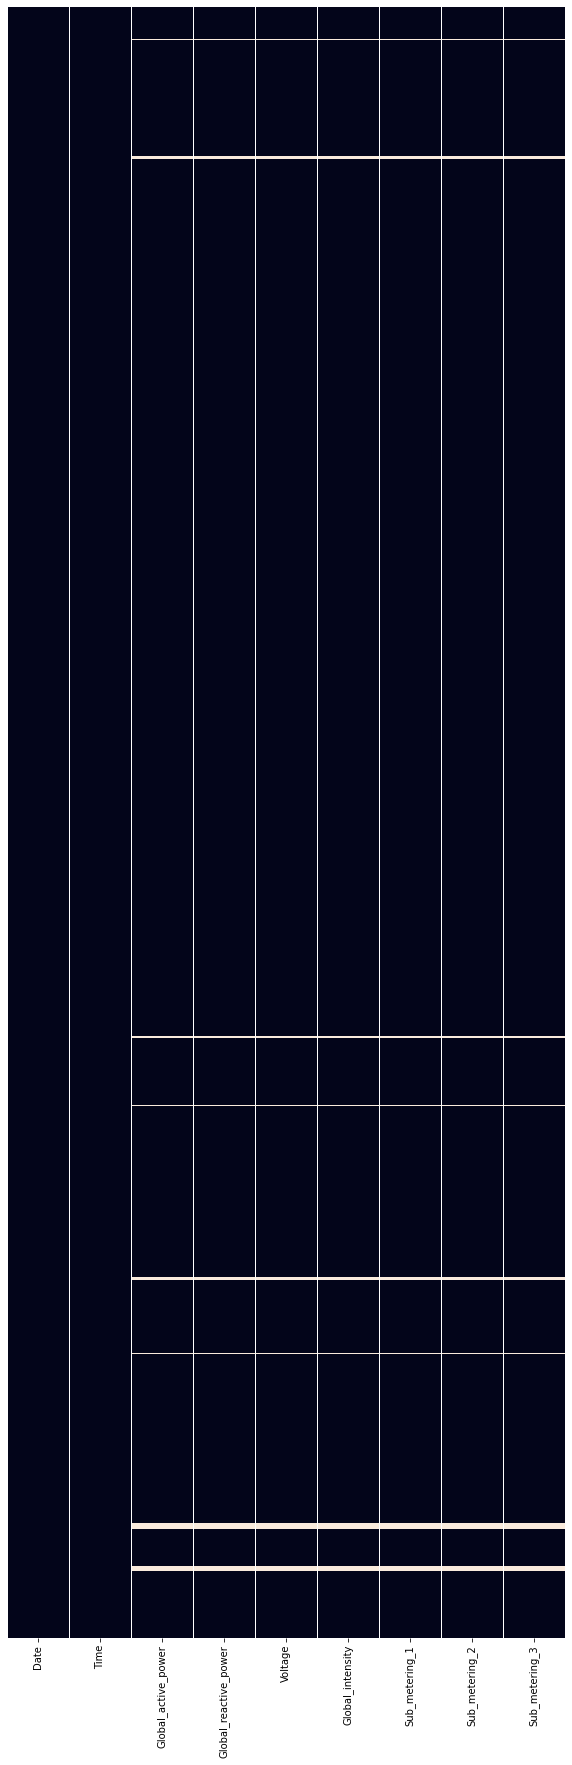

In [9]:
plt.figure(figsize = (10,30))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [10]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
df.isnull().sum().sum()

181853

### Filling Null values with mean

In [12]:
for col in df.columns[2:]:
    df[col] = df[col].astype('float') # the numbers are originally string (coz object dtype), so to find mean we need to convert them into float
    print(col, ' ----------- ', df[col].mean())

Global_active_power  -----------  1.091615036500693
Global_reactive_power  -----------  0.12371447630385488
Voltage  -----------  240.83985797447758
Global_intensity  -----------  4.6277593105838
Sub_metering_1  -----------  1.1219233096502186
Sub_metering_2  -----------  1.2985199679887571
Sub_metering_3  -----------  6.45844735712055


In [13]:
for col in df.columns[2:]:
    df[col].fillna(df[col].mean(), inplace=True)

In [14]:
df[df['Date'] == '28/4/2007']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
190476,28/4/2007,00:00:00,1.368000,0.086000,233.050000,5.800000,0.000000,1.00000,0.000000
190477,28/4/2007,00:01:00,1.370000,0.086000,233.220000,5.800000,0.000000,1.00000,0.000000
190478,28/4/2007,00:02:00,1.372000,0.088000,233.570000,5.800000,0.000000,2.00000,0.000000
190479,28/4/2007,00:03:00,1.370000,0.086000,233.400000,5.800000,0.000000,1.00000,0.000000
190480,28/4/2007,00:04:00,1.368000,0.086000,233.250000,5.800000,0.000000,1.00000,0.000000
...,...,...,...,...,...,...,...,...,...
191911,28/4/2007,23:55:00,1.091615,0.123714,240.839858,4.627759,1.121923,1.29852,6.458447
191912,28/4/2007,23:56:00,1.091615,0.123714,240.839858,4.627759,1.121923,1.29852,6.458447
191913,28/4/2007,23:57:00,1.091615,0.123714,240.839858,4.627759,1.121923,1.29852,6.458447
191914,28/4/2007,23:58:00,1.091615,0.123714,240.839858,4.627759,1.121923,1.29852,6.458447


In [15]:
df.shape

(2075259, 9)

In [16]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<AxesSubplot:>

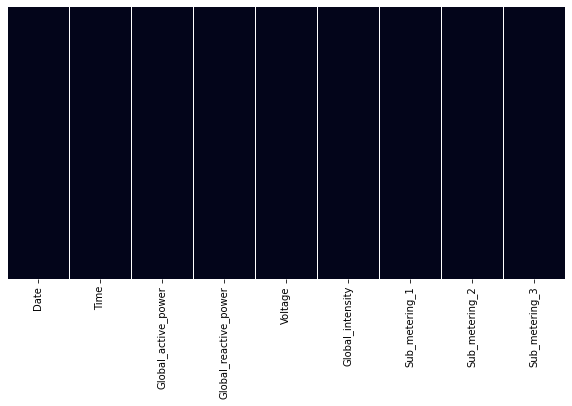

In [17]:
plt.figure(figsize = (10,5))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float16
 3   Global_reactive_power  float16
 4   Voltage                float16
 5   Global_intensity       float16
 6   Sub_metering_1         float16
 7   Sub_metering_2         float16
 8   Sub_metering_3         float16
dtypes: float16(7), object(2)
memory usage: 59.4+ MB


In [20]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.214844,0.417969,234.875,18.406250,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.359375,0.436035,233.625,23.000000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.375000,0.498047,233.250,23.000000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.386719,0.501953,233.750,23.000000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666016,0.527832,235.625,15.796875,0.0,1.0,17.0


In [21]:
df.to_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Household Electric Power Consumption\clean_household_power_consumption.csv', index=False)